In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import itertools
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import SparsePCA,PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('./IMDB_Dataset.csv',index_col=0)

In [3]:
df.head()

,sentiment
review,
"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br

In [4]:
df.shape

(50000, 1)

In [7]:
# convert the classes to 0 and 1
df['sentiment'] = pd.factorize(df['sentiment'])[0]

In [9]:
# Sample to train , test and validation data
X=df.drop(columns=['sentiment'])
y=df.loc[:,'sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.15, random_state=15)

In [10]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import SparsePCA,PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import VarianceThreshold

Classes look even

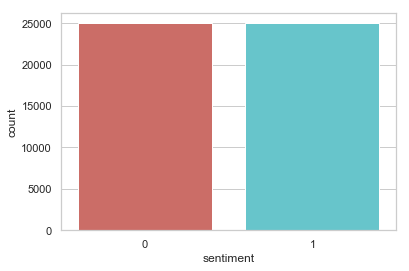

<Figure size 432x288 with 0 Axes>

In [13]:
sns.countplot(x=y,data=df,palette='hls')
plt.show()
plt.savefig('count_plot')

In [2]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [3]:
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [4]:
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [5]:

# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


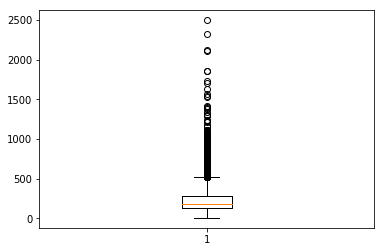

In [6]:
...
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

In [7]:
# MLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [9]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [51]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [52]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               3200200   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 201       
Total params: 3,360,401
Trainable params: 3,360,401
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=128, verbose=10)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
Epoch 2/4


In [ ]:
import re
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from keras import Sequential

In [34]:
data = pd.read_csv('./IMDB_Dataset.csv')

In [35]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [36]:
def remove_punct(text): 
    # punctuation marks 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "") 
  
    return text


In [37]:
def remove_urls(text):
    #Remove HyperText Links
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^ftp?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    
    return text

In [38]:
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [39]:
# Clean Text
data['review'] = data.review.map(str) \
                            .map(lambda x: x.lower()) \
                            .map(lambda x: x.strip()) \
                            .map(lambda x: re.sub(r'\d+', '', x)) \
                            .map(remove_punct) \
                            .map(remove_urls) \
                            .map(remove_html_tags)

In [40]:
# Convert sentiment to int
sentiment_map = {"positive": 1, "negative": -1}
data["sentiment"] = data.sentiment.map(lambda x: sentiment_map[x])

In [41]:
def create_model(optimizer="adam", dropout=0.1, init='uniform', nbr_features=2500, dense_nparams=256):
    model = Sequential()
    model.add(Dense(dense_nparams, activation='relu', input_shape=(nbr_features,), kernel_initializer=init,)) 
    model.add(Dropout(dropout), )
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model

In [42]:
kears_estimator = KerasClassifier(build_fn=create_model, verbose=1)

In [43]:
estimator = Pipeline([("tfidf", TfidfVectorizer(analyzer ="word", 
                                                max_features=2500,)), 
                       ('ss', StandardScaler(with_mean=False,)), 
                       ("kc", kears_estimator)])

In [44]:
# define the grid search parameters
param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2), (2,2), (1,3)],
    'tfidf__use_idf': [True, False],
    'kc__epochs': [10, 100, ],
    'kc__dense_nparams': [32, 256, 512],
    'kc__init': [ 'uniform', 'zeros', 'normal', ], 
    'kc__batch_size':[2, 16, 32],
    'kc__optimizer':['RMSprop', 'Adam', 'Adamax', 'sgd'],
    'kc__dropout': [0.5, 0.4, 0.3, 0.2, 0.1, 0]
}

In [45]:
X = data.review
y = data.sentiment
kfold_splits = 5
grid = GridSearchCV(estimator=estimator,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=kfold_splits,  #StratifiedKFold(n_splits=kfold_splits, shuffle=True)
                    param_grid=param_grid,)

In [50]:
grid_result = grid.fit(X, y, ) #callbacks=[tbCallBack]

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
def create_model(dense_layer_sizes, optimizer="adam", dropout=0.1, init='uniform', nbr_features=2500, dense_nparams=256):
    model = Sequential()
    model.add(Dense(dense_nparams, activation='relu', input_shape=(nbr_features,), kernel_initializer=init,)) 
    model.add(Dropout(dropout), )
    for layer_size in dense_layer_sizes:
        model.add(Dense(layer_size, activation='relu'))
        model.add(Dropout(dropout), )
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model